In [ ]:
from openai import OpenAI
import os
from dotenv import load_dotenv
load_dotenv()



In [ ]:
from openai import OpenAI

# Inicializa el cliente
# Si tienes la variable de entorno OPENAI_API_KEY configurada, no necesitas pasar el api_key aquí.
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

try:
    # Crear una solicitud de completado de chat
    response = client.chat.completions.create(
        model="gpt-4o",  # O "gpt-3.5-turbo" para pruebas más baratas
        messages=[
            {"role": "system", "content": "Eres un asistente experto en tecnología."},
            {"role": "user", "content": "Hola, confirma si esta conexión funciona correctamente."}
        ],
        temperature=0.7,
    )

    # Imprimir la respuesta
    print("Respuesta de la API:")
    print(response.choices[0].message.content)

except Exception as e:
    print(f"Hubo un error al conectar: {e}")

Respuesta de la API:
¡Hola! Actualmente puedo ver tu mensaje, así que parece que la conexión funciona correctamente. ¿En qué puedo ayudarte hoy?


In [5]:
# Diccionario de Categorías Técnico-Tácticas
# La clave es la Categoria, los valores son las palabras que buscamos en el excel.

categorias_entrenamiento = {
    "VIDEO_ANALISIS": [
        "Review Clip", "Meeting", "Video", "Revisión"
    ],
    "FINALIZACION": [
        "Finishing", "Shot", "Remate", "Crosses", "Goal", "Shooting", "1st Post"
    ],
    "TACTICA_OFENSIVA": [
        "Movements", "Attack", "Counter Attack", "Strikers", "Space", "Box"
    ],
    "TECNICA_INDIVIDUAL": [
        "Protect", "Turn", "Control", "Profiles", "Dribbling", "Skill"
    ],
    "DUELOS": [
        "1vs1", "Opponent", "Duel"
    ]
}

Consultando a ChatGPT... (esto puede tardar unos segundos)
Respuesta recibida:
 {
    "FINALIZACION": 28,
    "TACTICA_OFENSIVA": 5,
    "TECNICA_INDIVIDUAL": 3,
    "VIDEO_ANALISIS": 10,
    "FISICO_OTROS": 0
}


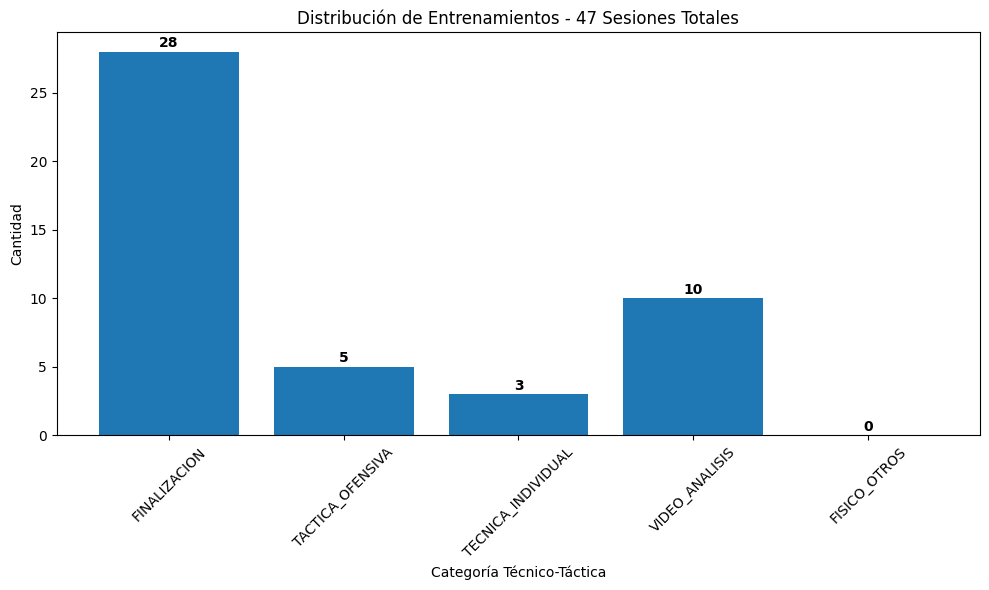

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from openai import OpenAI

# ---------------------------------------------------------
# 1. CONFIGURACIÓN Y CARGA DE DATOS
# ---------------------------------------------------------

# Tu API Key (idealmente usa variables de entorno, pero para prueba ponla aquí)
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Cargar el archivo (Ajusta el nombre si es necesario)
# Si es Excel real usa pd.read_excel("archivo.xlsx")
archivo = "individual_activities_Luca_Kjerrumgaard.xlsx"
df = pd.read_excel(archivo)

# Preparamos los datos para enviarlos a GPT.
# Concatenamos Tipo y Subtipo para que entienda el contexto (ej: "Review Clip: POST MATCH")
lista_entrenamientos = (df['tipo'] + ": " + df['subtipo']).tolist()

# Convertimos la lista a un string para meterlo en el prompt
texto_para_analizar = "\n".join(lista_entrenamientos)

# ---------------------------------------------------------
# 2. DEFINICIÓN DEL PROMPT Y LLAMADA A LA API
# ---------------------------------------------------------

system_prompt = """
Eres un Analista de Datos de Fútbol experto. 
Tu objetivo es categorizar una lista de actividades de entrenamiento y devolver un conteo exacto en formato JSON.

Las categorías permitidas son:
1. FINALIZACION (Remates, Shooting, Crosses, Finishing, Goles)
2. TACTICA_OFENSIVA (Movimientos, Attack, Space, Box, Desmarques)
3. TECNICA_INDIVIDUAL (Control, Turn, Protect, Dribbling, Perfiles)
4. VIDEO_ANALISIS (Review, Meeting, Video, Zoom)
5. FISICO_OTROS (Gym, Activación, o no clasificable)

Reglas:
- Analiza el contexto de cada línea.
- Devuelve UNICAMENTE un objeto JSON con el formato: {"Categoria": Cantidad_Entera}.
- No escribas nada fuera del JSON.
"""

print("Consultando a ChatGPT... (esto puede tardar unos segundos)")

try:
    response = client.chat.completions.create(
        model="gpt-4o", # O gpt-3.5-turbo si quieres ahorrar
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": f"Clasifica y cuenta esta lista:\n{texto_para_analizar}"}
        ],
        temperature=0, # Temperatura 0 para ser lo más determinista posible
        response_format={"type": "json_object"} # ¡CLAVE! Fuerza la respuesta en JSON
    )

    # ---------------------------------------------------------
    # 3. PROCESAMIENTO DE LA RESPUESTA
    # ---------------------------------------------------------
    
    contenido_respuesta = response.choices[0].message.content
    print("Respuesta recibida:\n", contenido_respuesta)
    
    # Convertir el string JSON a un diccionario de Python
    datos_grafico = json.loads(contenido_respuesta)

    # ---------------------------------------------------------
    # 4. GENERACIÓN DEL GRÁFICO
    # ---------------------------------------------------------

    categorias = list(datos_grafico.keys())
    valores = list(datos_grafico.values())

    plt.figure(figsize=(10, 6))
    barras = plt.bar(categorias, valores, color='#1f77b4')

    # Añadir etiquetas encima de las barras
    for bar in barras:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom', fontweight='bold')

    plt.title(f'Distribución de Entrenamientos - {len(lista_entrenamientos)} Sesiones Totales')
    plt.xlabel('Categoría Técnico-Táctica')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Mostrar gráfico
    plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")

Consultando a ChatGPT... (esto puede tardar unos segundos)
Respuesta recibida:
 {
    "FINALIZACION": 28,
    "TACTICA_OFENSIVA": 5,
    "TECNICA_INDIVIDUAL": 3,
    "VIDEO_ANALISIS": 10,
    "FISICO_OTROS": 0
}


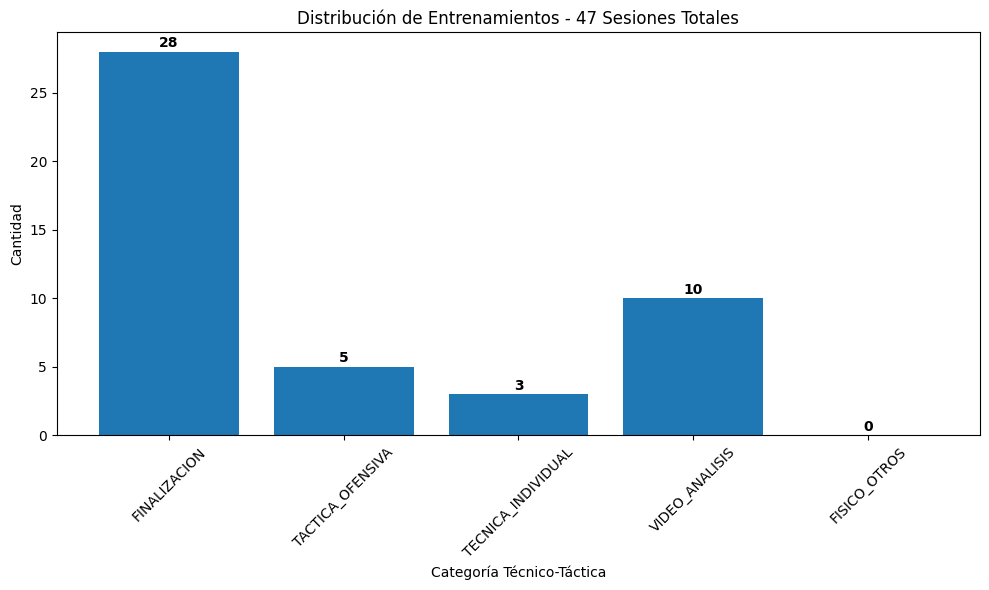

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from openai import OpenAI

# ---------------------------------------------------------
# 1. CONFIGURACIÓN Y CARGA DE DATOS
# ---------------------------------------------------------

# Tu API Key (idealmente usa variables de entorno, pero para prueba ponla aquí)
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Cargar el archivo (Ajusta el nombre si es necesario)
# Si es Excel real usa pd.read_excel("archivo.xlsx")
archivo = "individual_activities_Luca_Kjerrumgaard.xlsx"
df = pd.read_excel(archivo)

# Preparamos los datos para enviarlos a GPT.
# Concatenamos Tipo y Subtipo para que entienda el contexto (ej: "Review Clip: POST MATCH")
lista_entrenamientos = (df['tipo'] + ": " + df['subtipo']).tolist()

# Convertimos la lista a un string para meterlo en el prompt
texto_para_analizar = "\n".join(lista_entrenamientos)

# ---------------------------------------------------------
# 2. DEFINICIÓN DEL PROMPT Y LLAMADA A LA API
# ---------------------------------------------------------

system_prompt = """
Eres un Analista de Datos de Fútbol experto. 
Tu objetivo es categorizar una lista de actividades de entrenamiento y devolver un conteo exacto en formato JSON.

Las categorías permitidas son:
1. FINALIZACION (Remates, Shooting, Crosses, Finishing, Goles)
2. TACTICA_OFENSIVA (Movimientos, Attack, Space, Box, Desmarques)
3. TECNICA_INDIVIDUAL (Control, Turn, Protect, Dribbling, Perfiles)
4. VIDEO_ANALISIS (Review, Meeting, Video, Zoom)
5. FISICO_OTROS (Gym, Activación, o no clasificable)

Reglas:
- Analiza el contexto de cada línea.
- Devuelve UNICAMENTE un objeto JSON con el formato: {"Categoria": Cantidad_Entera}.
- No escribas nada fuera del JSON.
"""

print("Consultando a ChatGPT... (esto puede tardar unos segundos)")

try:
    response = client.chat.completions.create(
        model="gpt-4o", # O gpt-3.5-turbo si quieres ahorrar
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": f"Clasifica y cuenta esta lista:\n{texto_para_analizar}"}
        ],
        temperature=0, # Temperatura 0 para ser lo más determinista posible
        response_format={"type": "json_object"} # ¡CLAVE! Fuerza la respuesta en JSON
    )

    # ---------------------------------------------------------
    # 3. PROCESAMIENTO DE LA RESPUESTA
    # ---------------------------------------------------------
    
    contenido_respuesta = response.choices[0].message.content
    print("Respuesta recibida:\n", contenido_respuesta)
    
    # Convertir el string JSON a un diccionario de Python
    datos_grafico = json.loads(contenido_respuesta)

    # ---------------------------------------------------------
    # 4. GENERACIÓN DEL GRÁFICO
    # ---------------------------------------------------------

    categorias = list(datos_grafico.keys())
    valores = list(datos_grafico.values())

    plt.figure(figsize=(10, 6))
    barras = plt.bar(categorias, valores, color='#1f77b4')

    # Añadir etiquetas encima de las barras
    for bar in barras:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom', fontweight='bold')

    plt.title(f'Distribución de Entrenamientos - {len(lista_entrenamientos)} Sesiones Totales')
    plt.xlabel('Categoría Técnico-Táctica')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Mostrar gráfico
    plt.show()

except Exception as e:
    print(f"Ocurrió un error: {e}")